In [35]:
import numpy as np
import os
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time
print(plt.rcParams["axes.prop_cycle"])

cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


(6010, 512)
[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 6010 samples in 0.002s...
[t-SNE] Computed neighbors for 6010 samples in 0.259s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6010
[t-SNE] Computed conditional probabilities for sample 2000 / 6010
[t-SNE] Computed conditional probabilities for sample 3000 / 6010
[t-SNE] Computed conditional probabilities for sample 4000 / 6010
[t-SNE] Computed conditional probabilities for sample 5000 / 6010
[t-SNE] Computed conditional probabilities for sample 6000 / 6010
[t-SNE] Computed conditional probabilities for sample 6010 / 6010
[t-SNE] Mean sigma: 1.714806
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.076538
[t-SNE] KL divergence after 300 iterations: 2.495350
[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 6010 samples in 0.002s...
[t-SNE] Computed neighbors for 6010 samples in 0.248s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6010
[t-SNE] Computed

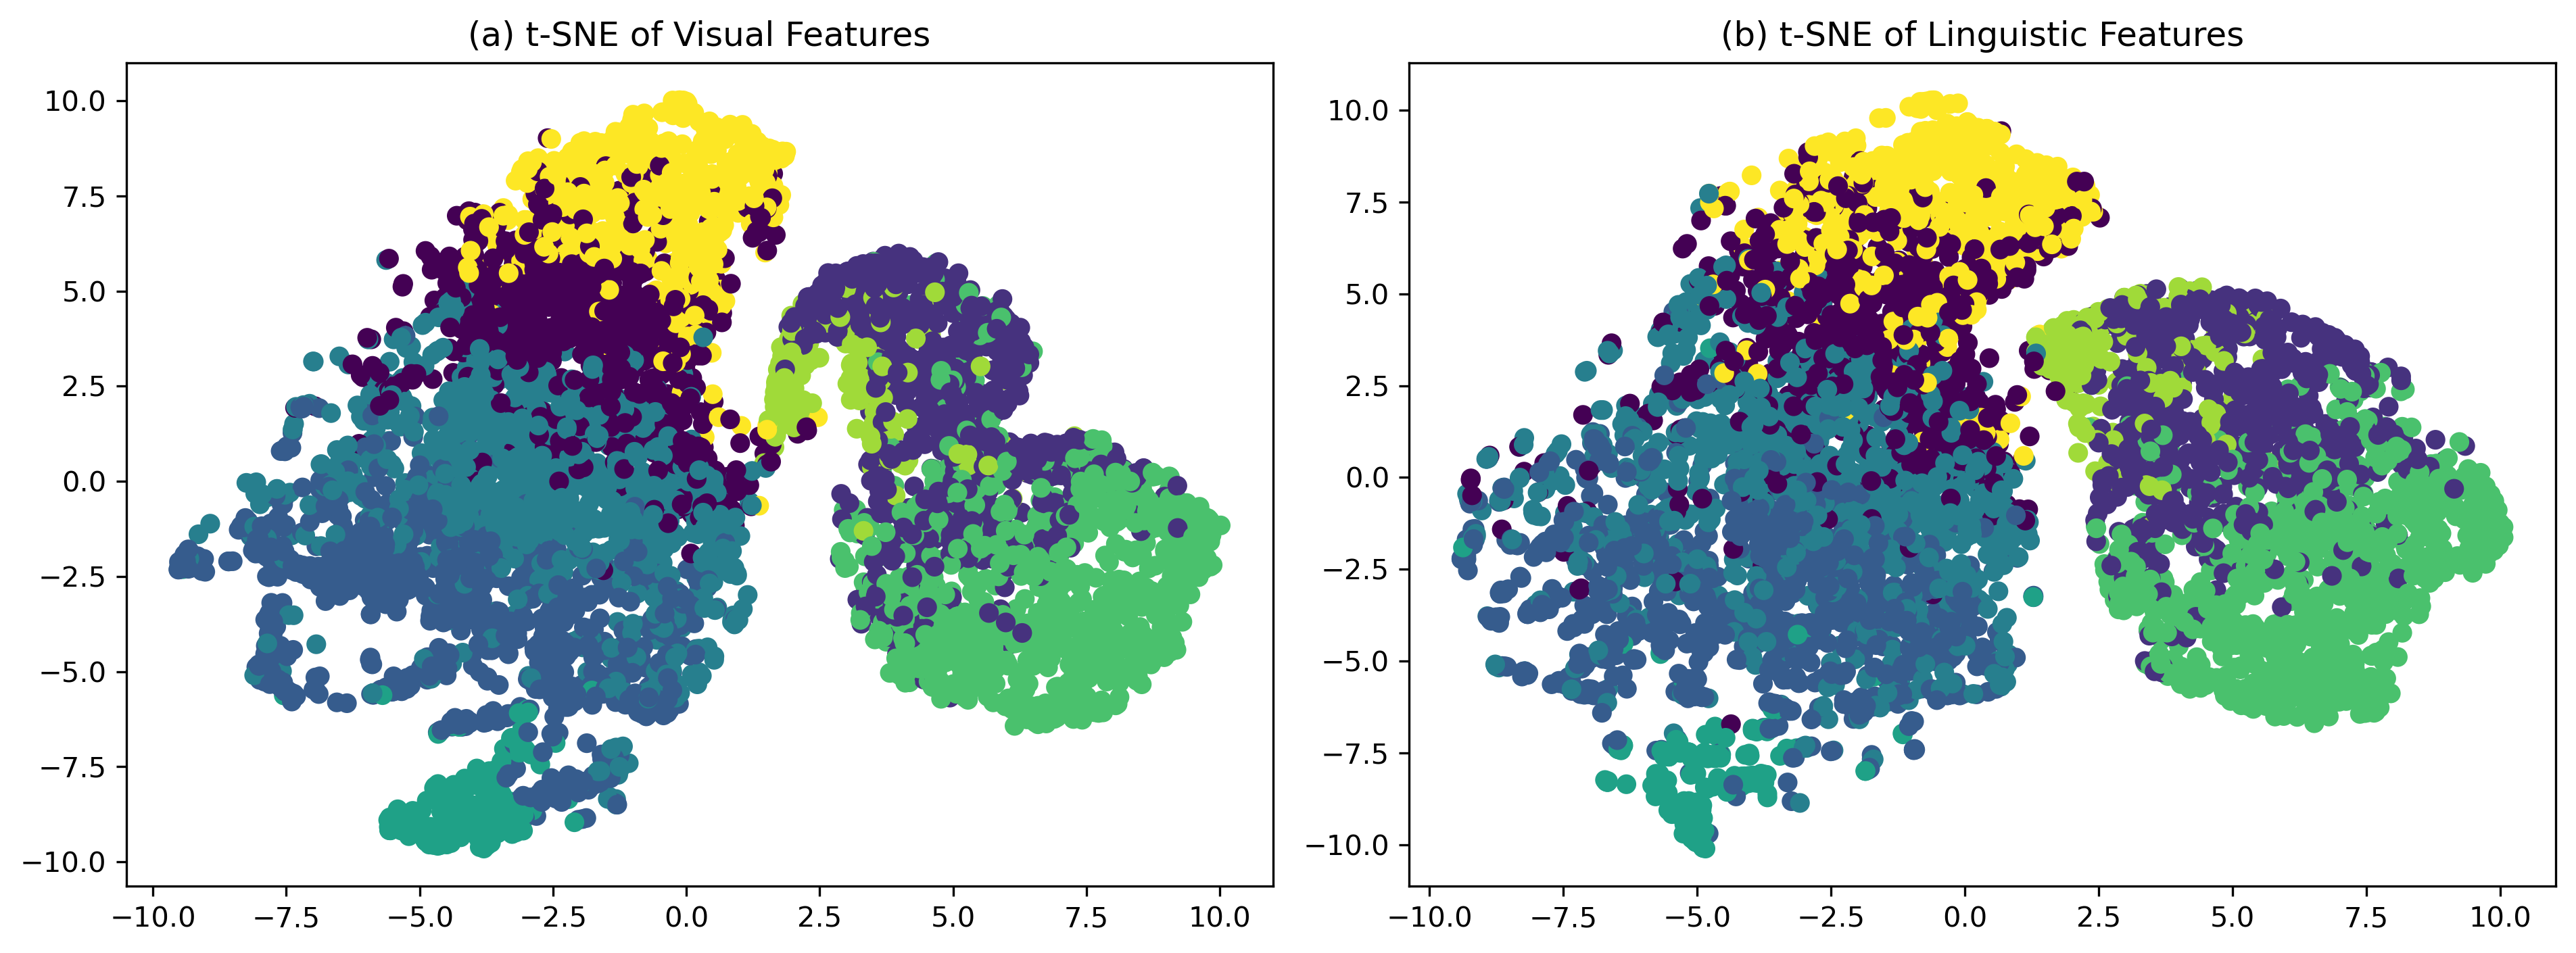

In [56]:
# time.sleep(120)
feature_root = "/root/autodl-tmp/data"
cluster_num = 8
CMAP = "viridis"

rgb_cls = np.load(os.path.join(feature_root, "rgb_cls.npy"))
depth_cls = np.load(os.path.join(feature_root, "depth_cls.npy"))
inst_cls = np.load(os.path.join(feature_root, "inst_cls.npy"))
sub_cls = np.load(os.path.join(feature_root, "sub_cls.npy"))
positive_idx = np.load(os.path.join(feature_root, "positive_idx.npy"))
color_map = np.load(os.path.join(feature_root, "tmp/color_map1.npy"))

rgb_cls = (rgb_cls+depth_cls)/2 # Visual features
inst_cls = (inst_cls+sub_cls)/2 # Linguistic features
print(rgb_cls.shape)
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(6.4*2, 4.8), dpi=300)
tsne = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=300)
tsne_results = tsne.fit_transform(rgb_cls)
axes[0].scatter(tsne_results[:, 0] ,tsne_results[:, 1], c=color_map, cmap=CMAP)
axes[0].set_title("(a) t-SNE of Visual Features")
# axes[0].set_axis_off()
# axes[0].set_xticks([])

tsne = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=300)
tsne_results = tsne.fit_transform(inst_cls)
axes[1].scatter(tsne_results[:, 0] ,-tsne_results[:, 1], c=color_map, cmap=CMAP)
axes[1].set_title("(b) t-SNE of Linguistic Features")
# axes[1].set_axis_off()
plt.tight_layout()
plt.savefig("feature_visualization.pdf", dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()


In [37]:
a = set()
for i,v in enumerate(color_map):
    if positive_idx[i]:
        a.add(v)
print(a)
# Left parts of t-SNE are positive clusters

{0, 2, 3, 4, 7}


In [48]:
rgb_cls_norm = rgb_cls/ np.linalg.norm(rgb_cls, axis=1, keepdims=True)
inst_cls_norm = inst_cls/ np.linalg.norm(inst_cls, axis=1, keepdims=True)
cos_score = (rgb_cls_norm*inst_cls_norm).sum(axis=1)

In [49]:
cos_score

array([0.9599566 , 0.97000295, 0.95916444, ..., 0.9785455 , 0.96815366,
       0.97310334], dtype=float32)

In [51]:
cos_score.mean()

0.9542403

In [57]:
plt.rcParams['font.family']

['sans-serif']